In [1]:
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import pickle
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Load the data
df = pd.read_pickle('../data_cabspotting/cabspotting.pkl')

In [3]:
# Load the small OSMNX graph
streets_small = ox.load_graphml('san_francisco_streets_all.graphml', folder='../osmnx_data')

In [9]:
# Load the OSMNX graph
streets = ox.load_graphml('cabspotting_streets_all.graphml', folder='../osmnx_data')

In [4]:
kde = KernelDensity(bandwidth=0.00003, metric='haversine')
kde.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [6]:
start_positions = kde.sample(536)

In [7]:
start_positions[:5]

array([[-122.44124111,   37.80028783],
       [-122.40459304,   37.78171609],
       [-122.41877044,   37.80609486],
       [-122.38619843,   37.61622135],
       [-122.4204528 ,   37.78904165]])

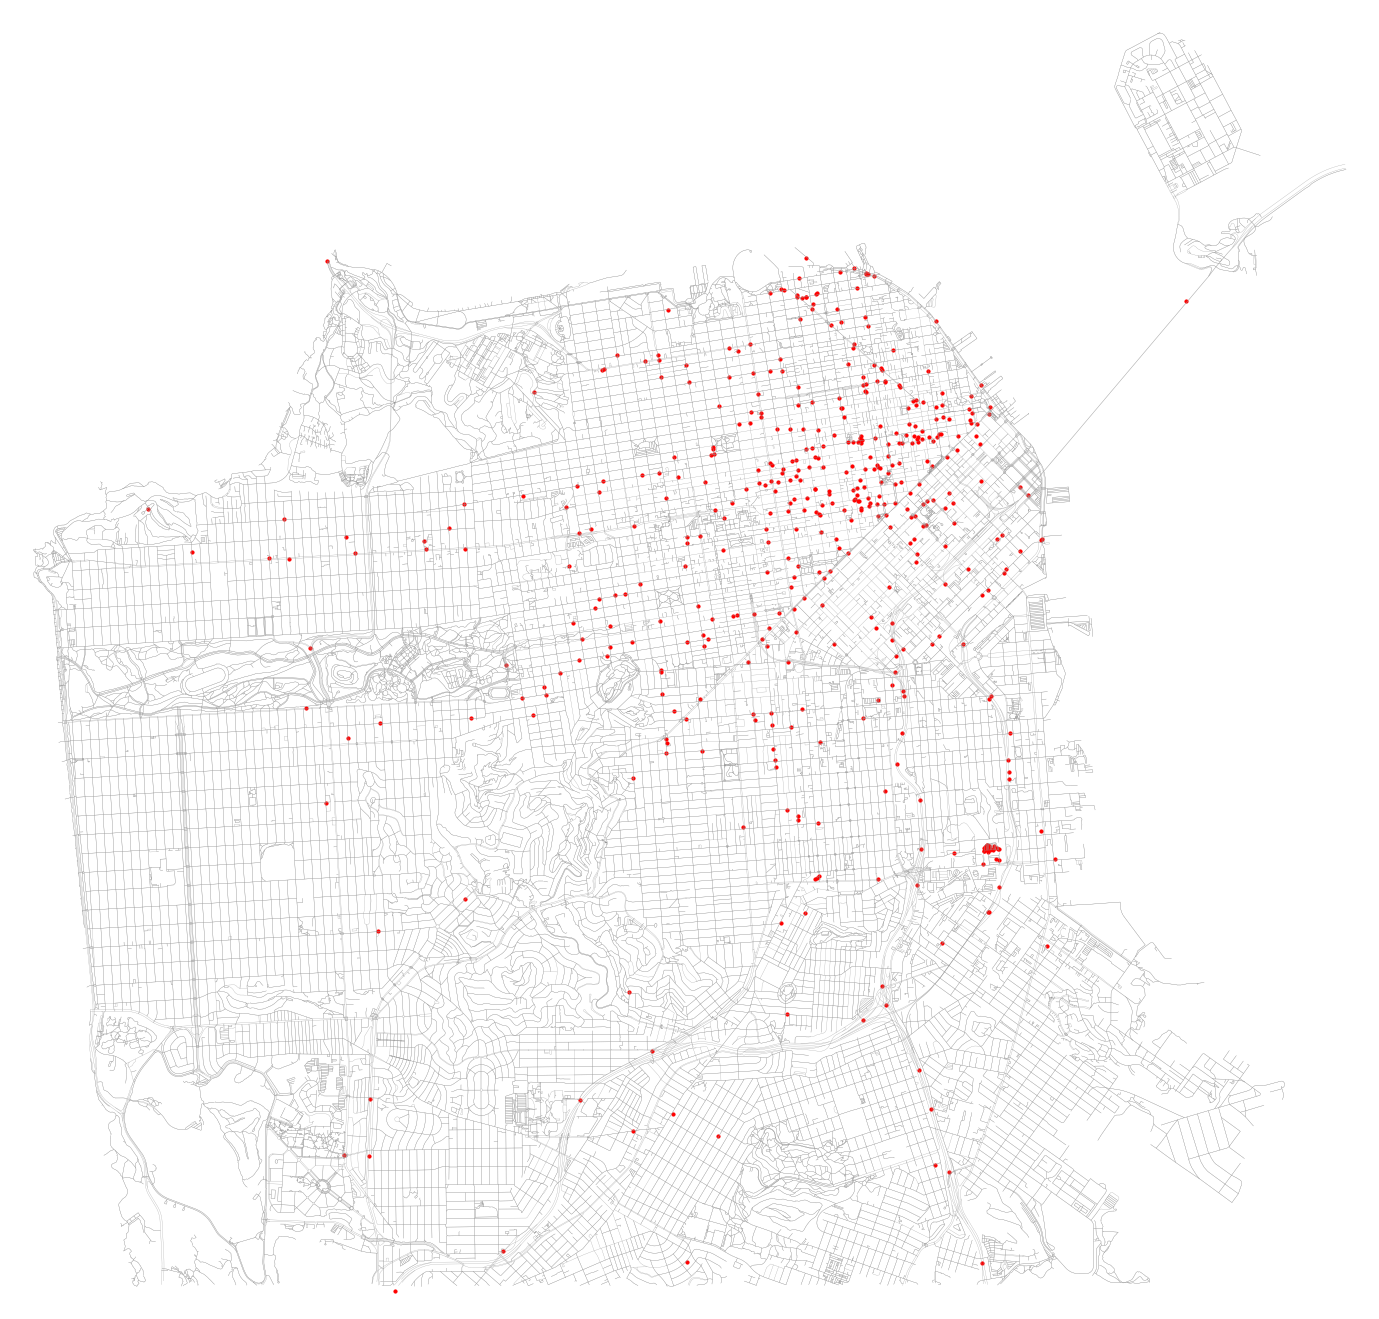

In [8]:
fig, ax = ox.plot_graph(streets_small, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions[:, 0], start_positions[:, 1], c='#ff0000', s=10.0, alpha=1.0)

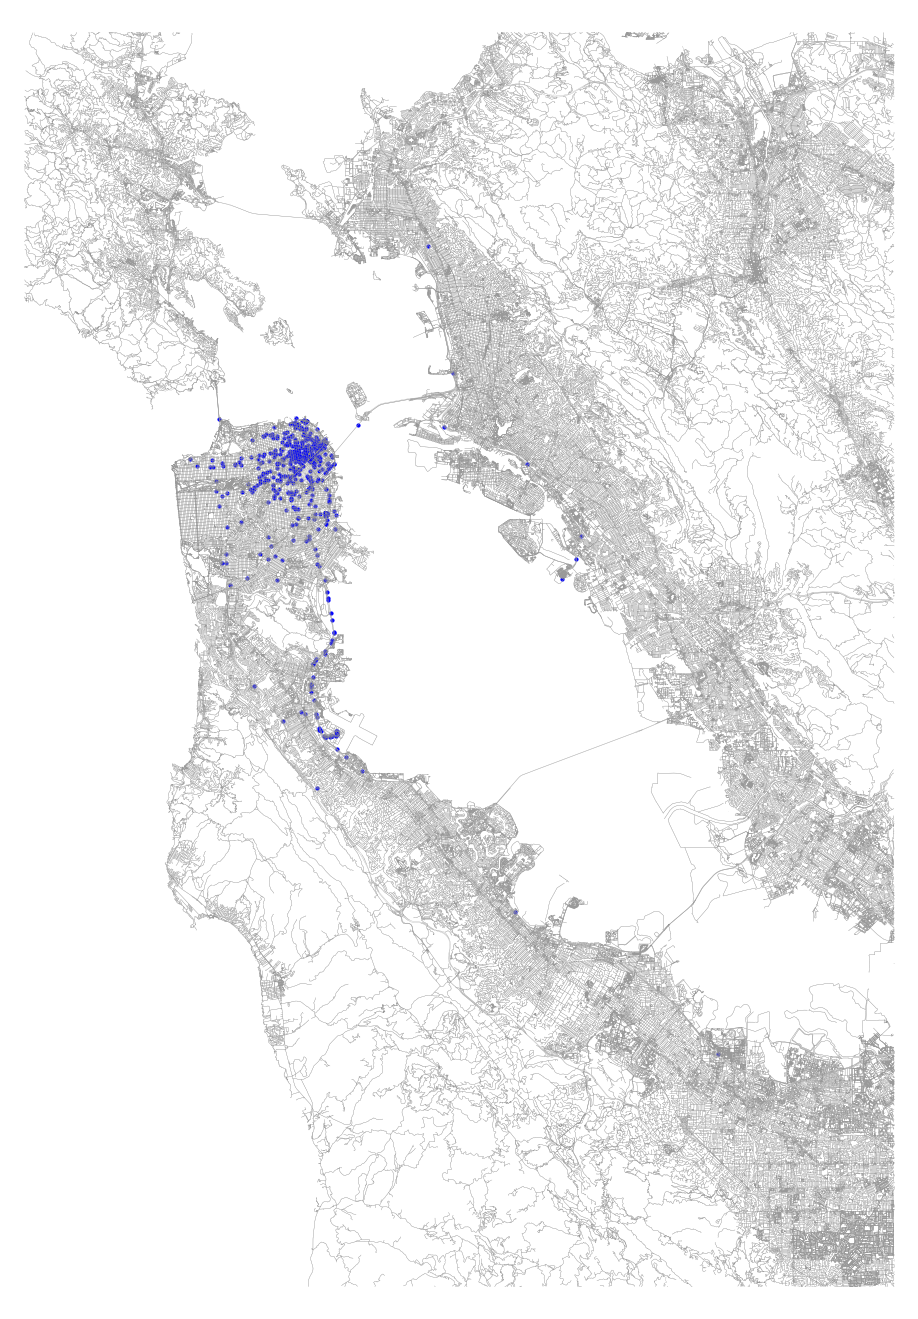

In [10]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(start_positions[:, 0], start_positions[:, 1], c='#ff0000', s=10.0, alpha=1.0)

In [13]:
pickle.dump(kde, open('../data_cabspotting/poskde_cabspotting_000003.pkl', 'wb'))

## Other data sets

### T-Drive

In [2]:
# Load the data
df = pd.read_pickle('../data_t-drive/t-drive.pkl')

In [3]:
kde = KernelDensity(bandwidth=0.00003, metric='haversine')
kde.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [4]:
test_positions = kde.sample(3)
test_positions

array([[116.56709757,  39.91417377],
       [116.37089057,  39.96053401],
       [116.08949236,  39.88590216]])

In [5]:
pickle.dump(kde, open('../data_t-drive/poskde_t-drive_000003.pkl', 'wb'))

### MDC

In [6]:
# Load the data
df = pd.read_pickle('../data_mdc/mdc.pkl')

In [7]:
kde = KernelDensity(bandwidth=0.00003, metric='haversine')
kde.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [8]:
test_positions = kde.sample(3)
test_positions

array([[46.57000413,  6.66006635],
       [46.52304087,  6.60098972],
       [46.47999179,  6.76995524]])

In [9]:
pickle.dump(kde, open('../data_mdc/poskde_mdc_000003.pkl', 'wb'))

### GeoLife

In [10]:
# Load the data
df = pd.read_pickle('../data_geolife/geolife.pkl')

In [11]:
kde = KernelDensity(bandwidth=0.00003, metric='haversine')
kde.fit(df[['longitude', 'latitude']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=3e-05, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='haversine',
       metric_params=None, rtol=0)

In [12]:
test_positions = kde.sample(3)
test_positions

array([[116.26572207,  39.94616073],
       [108.33385914,  22.81433861],
       [116.37524567,  39.98643475]])

In [13]:
pickle.dump(kde, open('../data_geolife/poskde_geolife_000003.pkl', 'wb'))